In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
from shift import LagFactor

warnings.filterwarnings('ignore')

## Data preparation

In [2]:
rgb = pd.read_csv('data_clean/RGBI.csv', 
                  parse_dates=True, 
                  dayfirst=True, 
                  index_col=0).rename(columns={'Цена':'RGBi'})['RGBi']

bonds = pd.read_csv('data_clean/fed_bonds_clean.csv', 
                    parse_dates=True, 
                    dayfirst=True, 
                    index_col=0)['1_years']

key_rate = pd.read_csv('data_clean/int_rates_clean.csv', index_col=0, parse_dates=True, dayfirst=True)
key_rate['change'] = key_rate['Real_rate'] - key_rate['Prev_rate']

change_points_grid = pd.read_csv('change_point/RGBI_result.csv', index_col=0).rename_axis(columns='Date')
change_points_grid.index = pd.to_datetime(change_points_grid.index)
change_points = change_points_grid[change_points_grid['Value'] == 1]

In [3]:
bonds = bonds[~bonds.index.duplicated(keep='first')]

In [4]:
ss = set(bonds.index) - set(rgb.index)
gg = set(rgb.index) - set(bonds.index)

bonds = bonds.drop(ss, axis=0)
rgb = rgb.drop(gg, axis=0)

data = pd.concat([bonds, rgb], axis=1)

In [5]:
for column in data.columns:
    data[column] = data[column].str.replace(',', '.').astype(float)

# data = data.pct_change().iloc[1:,:]

## Calculations

In [6]:
lg = LagFactor(data, key_rate, change_points_grid)

In [8]:
corr_table = lg.get_cor(125)

In [9]:
corr_table

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Shift (days),,,,,,,,,,,,,,,
0,-0.900536,-0.442272,-0.919899,-0.494842,-0.835770,-0.973991,-0.926661,-0.821089,-0.926942,-0.972155,-0.970195,-0.851307,-0.943058,-0.900591,-0.921380
1,-0.897400,-0.425730,-0.917348,-0.483062,-0.829033,-0.959235,-0.923782,-0.823943,-0.923427,-0.970886,-0.970377,-0.843205,-0.942201,-0.872407,-0.878572
2,-0.895776,-0.391296,-0.911978,-0.468475,-0.822844,-0.947616,-0.913697,-0.821497,-0.918912,-0.964980,-0.969827,-0.829332,-0.940540,-0.852578,-0.757152
3,-0.894387,-0.356774,-0.901679,-0.449533,-0.819166,-0.939458,-0.902599,-0.818809,-0.914019,-0.958140,-0.968858,-0.805093,-0.938546,-0.812249,-0.483441
4,-0.894269,-0.318919,-0.895374,-0.428213,-0.813320,-0.928711,-0.894127,-0.814398,-0.908220,-0.952079,-0.967502,-0.779527,-0.936387,-0.780928,-0.213821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.759083,0.680466,0.836338,0.762772,-0.538501,-0.603021,-0.730524,-0.404111,-0.420854,0.223119,-0.748475,-0.173239,-0.897835,-0.071392,NaN
122,-0.767692,0.663297,0.830159,0.775847,-0.517163,-0.597917,-0.731679,-0.398919,-0.401283,0.215242,-0.738643,-0.183623,-0.898021,-0.138614,NaN
123,-0.776455,0.652464,0.821466,0.794860,-0.496914,-0.593325,-0.729864,-0.397070,-0.380272,0.207629,-0.726297,-0.188072,-0.898980,-0.204942,NaN


In [10]:
best_cor = lg.get_best_cor()

In [11]:
best_cor

{2009: (0, -0.9005362383465929),
 2010: (100, 0.7077909391785981),
 2011: (0, -0.9198993839946998),
 2012: (0, -0.494841857326103),
 2013: (0, -0.8357695799579334),
 2014: (0, -0.9739913933288132),
 2015: (0, -0.9266612592236269),
 2016: (1, -0.8239428135372551),
 2017: (0, -0.9269417256566564),
 2018: (0, -0.9721548763842499),
 2019: (1, -0.9703769305739804),
 2020: (0, -0.8513071160556618),
 2021: (0, -0.9430584967722971),
 2022: (0, -0.9005908688397374),
 2023: (7, 1.0000000000001554)}

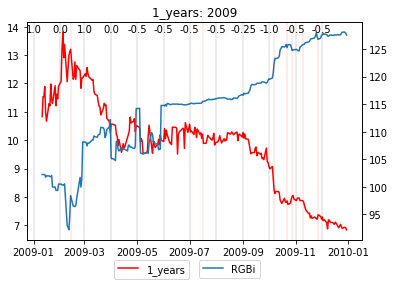

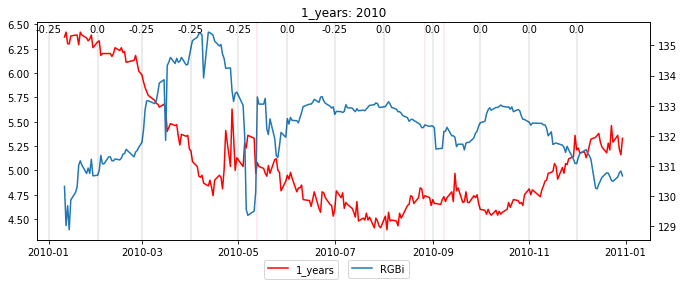

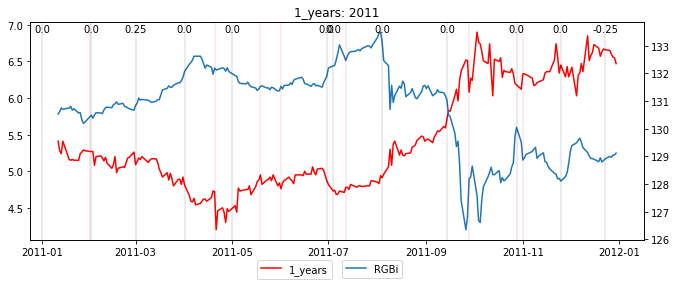

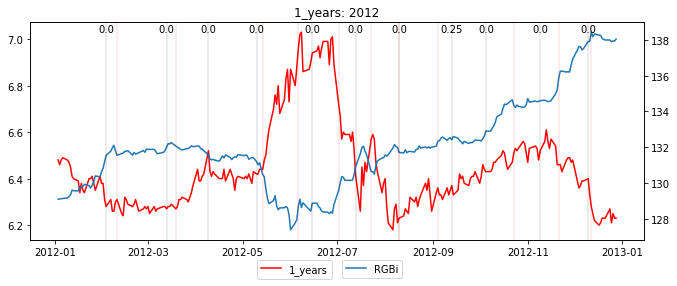

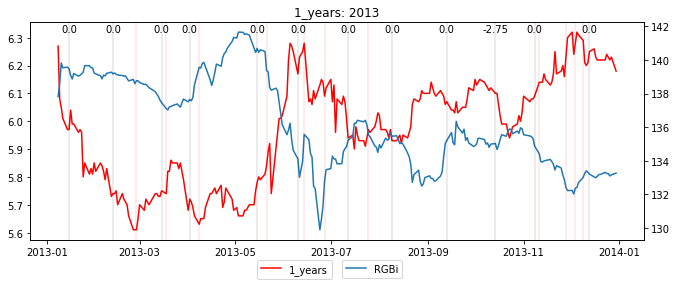

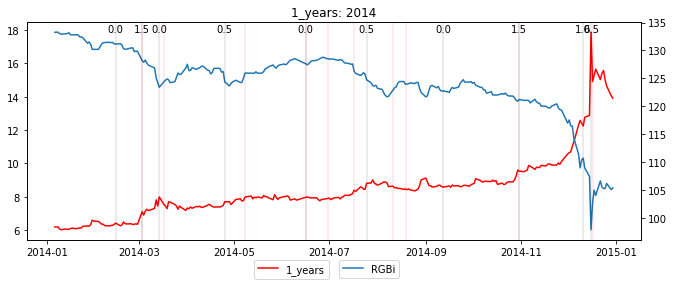

In [ ]:
for year in range(2009, 2023):
    x = lg.get_shift(year=year)